In [1]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

In [2]:
# Enter your annual salary
salary = 40000

# Assume a tax rate of 25%
tax_rate = 0.25

# Calculate your salary after taxes
salary_after_taxes = salary*(1 - tax_rate)
print("Salary after taxes: " + str(round(salary_after_taxes, 2)))

# Calculate your monthly salary after taxes
monthly_takehome_salary = salary_after_taxes / 12
print("Monthly takehome salary: " + str(round(monthly_takehome_salary, 2)))

Salary after taxes: 30000.0
Monthly takehome salary: 2500.0


In [3]:
# Next, calculate your total monthly expenses
monthly_expenses = 1500
print("Monthly expenses: " + str(round(monthly_expenses, 2)))

# Finally, calculate your monthly take-home savings
monthly_savings = monthly_takehome_salary - monthly_expenses
print("Monthly savings: " + str(round(monthly_savings, 2)))

Monthly expenses: 1500
Monthly savings: 1000.0


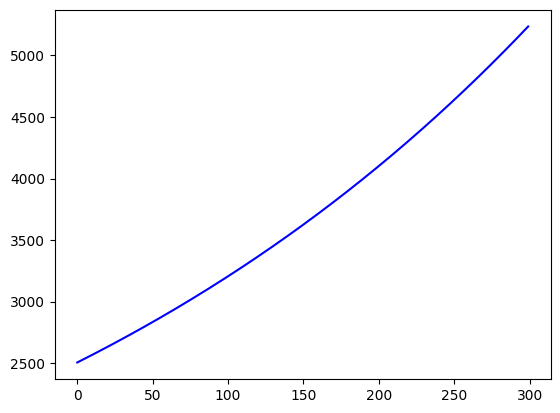

In [4]:
years = 25

# Create monthly forecasts up to the years from now
forecast_months = 12* years

# Set your annual salary growth rate
annual_salary_growth = 0.03

# Calculate your equivalent monthly salary growth rate
monthly_salary_growth = ( 1 + annual_salary_growth) ** (1/12) - 1

# Forecast the cumulative growth of your salary
cumulative_salary_growth_forecast = np.cumprod(np.repeat(1 + monthly_salary_growth, forecast_months))

# Calculate the actual salary forecast
salary_forecast = monthly_takehome_salary * cumulative_salary_growth_forecast

# Plot the forecasted salary
plt.plot(salary_forecast, color='blue')
plt.show()

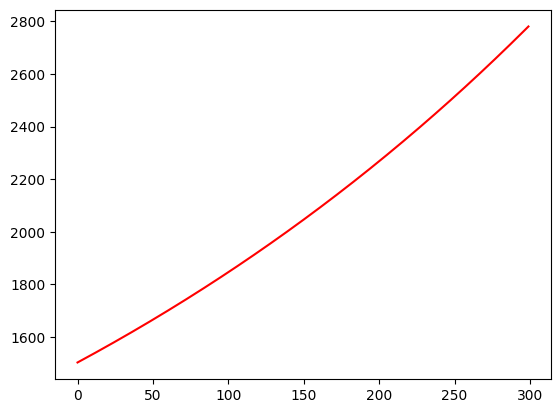

In [5]:
# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the equivalent monthly inflation rate
monthly_inflation = (1 + annual_inflation) ** (1/12) - 1

# Forecast cumulative inflation over time
cumulative_inflation_forecast = np.cumprod(np.repeat(1 + monthly_inflation, forecast_months))

# Calculate your forecasted expenses
expenses_forecast = monthly_expenses * cumulative_inflation_forecast

# Plot the forecasted expenses
plt.plot(expenses_forecast, color='red')
plt.show()

Your final net worth: 488337.26


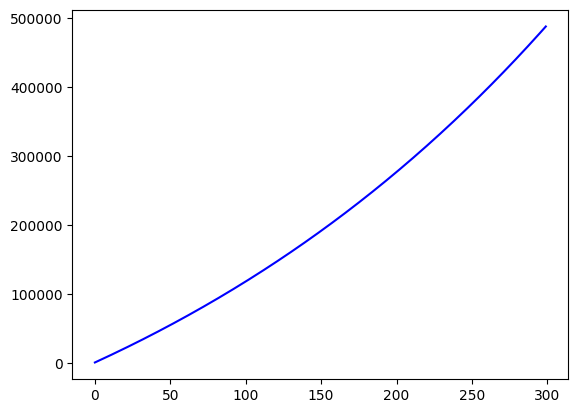

In [6]:
# Calculate your savings for each month
savings_forecast = salary_forecast - expenses_forecast

# Calculate your cumulative savings over time
cumulative_savings = np.cumsum(savings_forecast)

# Print the final cumulative savings after the years
final_net_worth = cumulative_savings[-1]
print("Your final net worth: " + str(round(final_net_worth, 2)))

# Plot the forecasted savings
plt.plot(cumulative_savings, color='blue')
plt.show()

In [7]:
# Set the annual investment return to 7%
investment_rate_annual = 0.07

# Calculate the monthly investment return
investment_rate_monthly = (1+investment_rate_annual)**(1/12) - 1

# Calculate your required monthly investment to amass $1M
required_investment_monthly = npf.pmt(rate=investment_rate_monthly, nper=forecast_months, pv=0, fv=-1000000)
print("You will have to invest $" + str(round(required_investment_monthly, 2)) + " per month to amass $1M over the years")

You will have to invest $1277.07 per month to amass $1M over the years


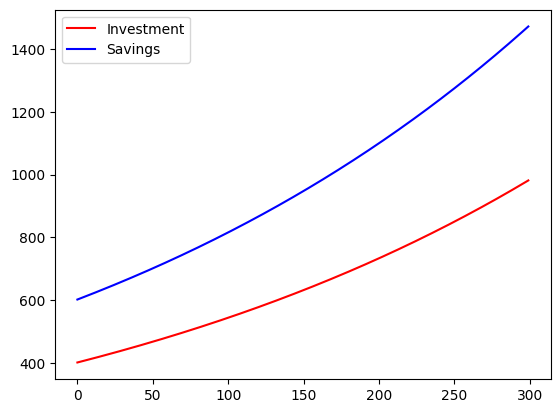

In [8]:
cash_flow_forecast = salary_forecast - expenses_forecast
monthly_investment_percentage = 0.4

# Calculate your monthly deposit into your investment account
investment_deposit_forecast = cash_flow_forecast * monthly_investment_percentage

# The rest goes into your savings account
savings_forecast_new = cash_flow_forecast * (1 - monthly_investment_percentage)

# Calculate your cumulative savings over time
cumulative_savings_new = np.cumsum(savings_forecast_new)

# Plot your forecasted monthly savings vs investments
plt.plot(investment_deposit_forecast, color='red', label='Investment')
plt.plot(savings_forecast_new, color='blue', label='Savings')
plt.legend()
plt.show()

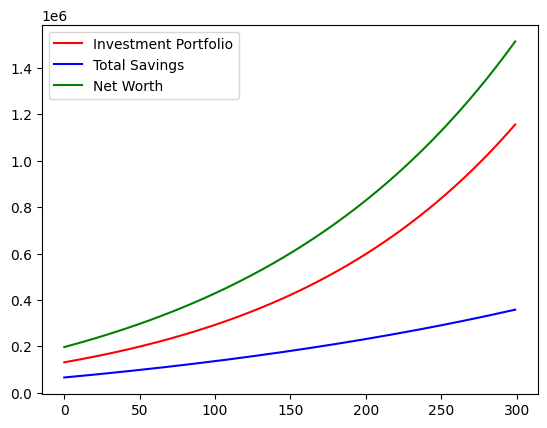

In [9]:
initial_savings = 65000
initial_investment = 130000

investment_portfolio = np.empty([forecast_months])
net_worth = np.empty([forecast_months])

# Loop through each forecast period
for i in range(forecast_months):
    
    # Find the previous investment deposit amount
    if i == 0: 
        previous_investment = initial_investment
    else:
        previous_investment = investment_portfolio[i - 1]
        
    # Calculate the value of your previous investments, which have grown
    previous_investment_growth = previous_investment*(1 + investment_rate_monthly)
    
    # Add your new deposit to your investment portfolio
    investment_portfolio[i] =  previous_investment_growth + investment_deposit_forecast[i]
    
    total_savings = initial_savings + cumulative_savings_new
    
    # Calculate your net worth at each point in time
    net_worth[i] = total_savings[i] + investment_portfolio[i]
         
# Plot your forecasted cumulative savings vs investments and net worth
plt.plot(investment_portfolio, color='red', label='Investment Portfolio')
plt.plot(total_savings, color='blue', label='Total Savings')
plt.plot(net_worth, color='green', label='Net Worth')
plt.legend()
plt.show()

In [10]:
# Set your future net worth
future_net_worth = net_worth[-1]

# Set the annual inflation rate to 2.5%
annual_inflation = 0.025

# Calculate the present value of your terminal wealth over the years
inflation_adjusted_net_worth = npf.pv(rate=annual_inflation, nper=years, pmt=0, fv=-1*future_net_worth)
print("Your inflation-adjusted net worth: $" + str(round(inflation_adjusted_net_worth, 2)))

Your inflation-adjusted net worth: $816704.09


In [11]:
expected_income = 2500
required_principal = expected_income / investment_rate_monthly

index = investment_portfolio.size
for i in np.arange(investment_portfolio.size):
    if investment_portfolio[i] > required_principal:
        index = i
        break
    
print("You need to have an investment portfolio of " + str(round(required_principal, 2)) + "$ to retire")    
print("You can retire in " + str(round(index/12, 0)) + " years")


You need to have an investment portfolio of 442153.47$ to retire
You can retire in 13.0 years
